<a href="https://colab.research.google.com/github/baherami/lupo/blob/main/note1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [50]:
rm -rf invasive_plants

In [51]:
from fastbook import *
from fastai.vision.widgets import *

In [52]:
key = os.environ.get('AZURE_SEARCH_KEY', '')

In [53]:
# bypass limitation of search API by relative keywords
from time import sleep
invasive_plant_types = {
    "Lupine": [
        "Lupinus polyphyllus",
        "Komealupiini",
        "lupiini",
        "Lupine",
    ],
    "Hogweed": [
        "Heracleum mantegazzianum",
        "Kaukasianjättiputki",
        "Hogweed",
    ],
    "Impatiens": [
        "Impatiens glandulifera",
        "Jättipalsami",
        "Impatiens",
    ]
}
path = Path("invasive_plants")

if not path.exists():
    path.mkdir()
    for item in invasive_plant_types.items():
        directory_name = item[0]
        destination_directory = (path/directory_name)
        destination_directory.mkdir(exist_ok=True)
        for entry in item[1]:
            results = search_images_bing(key, f'"{entry}"')
            download_images(destination_directory,
                            urls=results.attrgot('contentUrl'))
            sleep(1)  # to keep the api limitation in mind


Counting number of images


In [59]:
ls ./invasive_plants/Hogweed/  | wc -l 

237


In [60]:
ls ./invasive_plants/Lupine/ | wc -l 

251


In [61]:
ls ./invasive_plants/Impatiens/ | wc -l 

226


By augementation we will increase these numbers to get enough data for datasets

In [62]:
fns = get_image_files(path)
failed = verify_images(fns)
failed.map(Path.unlink);

In [63]:
invasive_plants = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    batch_tfms=aug_transforms(),
    get_y=parent_label,
    item_tfms=RandomResizedCrop(224, min_scale=0.5))


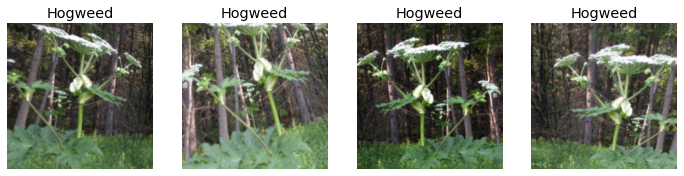

In [64]:
dataloaders = invasive_plants.dataloaders(path)
dataloaders.train.show_batch(max_n=4, nrows=1, unique=True)

In [65]:
learner = cnn_learner(dataloaders, resnet18, metrics=error_rate)
learner.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.436773,0.556484,0.239316,00:23


epoch,train_loss,valid_loss,error_rate,time
0,0.608982,0.484978,0.196581,00:22
1,0.452136,0.460283,0.205128,00:22
2,0.352448,0.528652,0.196581,00:22
3,0.280576,0.523113,0.205128,00:22


In [ ]:
learner = cnn_learner(dataloaders, resnet18, metrics=error_rate)
learner.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.412230,0.469083,0.170940,00:23


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


epoch,train_loss,valid_loss,error_rate,time
0,0.550222,0.407016,0.162393,00:23
1,0.409069,0.465480,0.153846,00:23
2,0.322470,0.526089,0.162393,00:23
3,0.270173,0.519126,0.170940,00:23


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [ ]:
learner = cnn_learner(dataloaders, resnet18, metrics=error_rate)
learner.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.412230,0.469083,0.170940,00:23


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


epoch,train_loss,valid_loss,error_rate,time
0,0.550222,0.407016,0.162393,00:23
1,0.409069,0.465480,0.153846,00:23
2,0.322470,0.526089,0.162393,00:23
3,0.270173,0.519126,0.170940,00:23


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


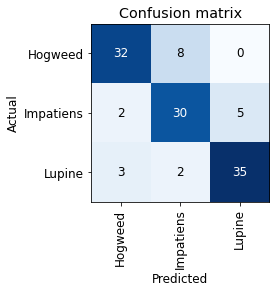

In [34]:
interp = ClassificationInterpretation.from_learner(learner)
interp.plot_confusion_matrix()

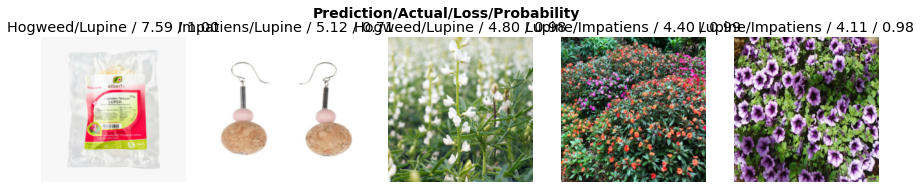

In [35]:
interp.plot_top_losses(5, nrows=1)

In [43]:
cleaner = ImageClassifierCleaner(learner)
cleaner

After cleaning in the previous step we can delete them


In [37]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [38]:
invasive_plants = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    batch_tfms=aug_transforms(),
    get_y=parent_label,
    item_tfms=RandomResizedCrop(224, min_scale=0.5))


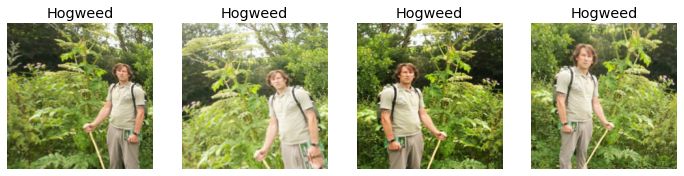

In [39]:
dataloaders = invasive_plants.dataloaders(path)
dataloaders.train.show_batch(max_n=4, nrows=1, unique=True)

In [44]:
learner = cnn_learner(dataloaders, resnet18, metrics=error_rate)
learner.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.546094,0.570400,0.264957,00:23


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


epoch,train_loss,valid_loss,error_rate,time
0,0.514276,0.435263,0.170940,00:22
1,0.409943,0.454978,0.145299,00:23
2,0.334298,0.463382,0.179487,00:22
3,0.258054,0.465911,0.170940,00:23


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


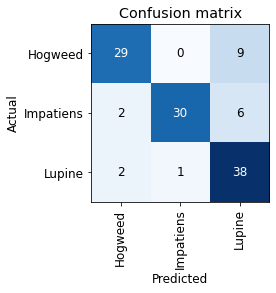

In [45]:
interp = ClassificationInterpretation.from_learner(learner)
interp.plot_confusion_matrix()

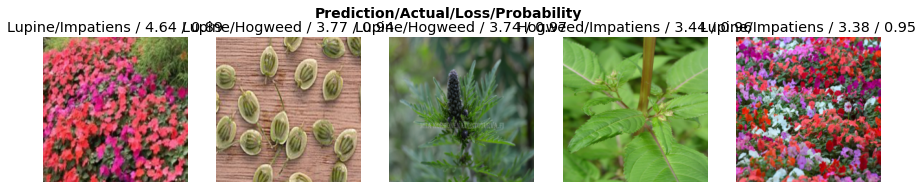

In [46]:
interp.plot_top_losses(5, nrows=1)

In [47]:
cleaner = ImageClassifierCleaner(learner)
cleaner

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
